In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e21b469e-5021-4d91-80f9-3d5f46645199',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
print(data)

{'status': {'timestamp': '2022-11-01T15:43:47.777Z', 'error_code': 0, 'error_message': None, 'elapsed': 99, 'credit_count': 1, 'notice': None, 'total_count': 9305}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9812, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.919546e+07,1.919546e+07,NaN,1,NaN,NaN,None,2022-11-01T15:42:00.000Z,20415.595214,4.224370e+10,4.1337,-0.099647,0.230452,3.896822,6.710352,0.447152,-12.670819,3.918868e+11,38.6189,4.287275e+11,None,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:43:58.933904
1,1027,Ethereum,ETH,ethereum,6166,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-11-01T15:42:00.000Z,1570.783650,1.628091e+10,-9.5581,-0.274686,0.275507,12.727718,21.601589,-3.914605,-5.402370,1.922229e+11,18.9642,1.922229e+11,None,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:43:58.933904
2,825,Tether,USDT,tether,41456,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.941993e+10,7.214177e+10,NaN,3,NaN,NaN,None,2022-11-01T15:42:00.000Z,0.999883,6.102250e+10,-3.0401,-0.001422,-0.016710,-0.020199,-0.011919,-0.019311,-0.027602,6.941185e+10,6.8480,7.213336e+10,None,2022-11-01T15:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-01 15:43:58.933904
3,1839,BNB,BNB,bnb,1132,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599781e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-11-01T15:42:00.000Z,319.387549,1.487036e+09,-30.6993,-0.051360,-1.575188,13.960381,13.273412,13.340289,7.310224,5.109503e+10,5.0365,6.387751e+10,None,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:43:58.933904
4,3408,USD Coin,USDC,usd-coin,6640,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.349502e+10,4.349502e+10,NaN,5,NaN,NaN,None,2022-11-01T15:42:00.000Z,0.999839,3.926189e+09,-8.2958,-0.015223,-0.017309,-0.028323,-0.012313,-0.017952,-0.032558,4.348802e+10,4.2885,4.348802e+10,None,2022-11-01T15:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-01 15:43:58.933904
5,52,XRP,XRP,xrp,831,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.008541e+10,9.998924e+10,NaN,6,NaN,NaN,None,2022-11-01T15:42:00.000Z,0.458010,1.371855e+09,6.8027,0.006449,1.145054,0.620564,0.253139,38.294314,22.779963,2.293961e+10,2.2612,4.580099e+10,None,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:43:58.933904
6,4687,Binance USD,BUSD,binance-usd,5369,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.139487e+10,2.139487e+10,NaN,7,NaN,NaN,None,2022-11-01T15:42:00.000Z,1.000156,7.445876e+09,-2.1233,-0.019423,0.021336,0.002394,0.089545,-0.008076,-0.002146,2.139821e+10,2.1092,2.139821e+10,None,2022-11-01T15:42:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-11-01 15:43:58.933904
7,74,Dogecoin,DOGE,dogecoin,588,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-11-01T15:42:00.000Z,0.140019,8.465082e+09,48.3482,0.751424,13.855957,129.859495,134.157935,124.185729,106.106404,1.857642e+10,1.8319,1.857642e+10,None,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:43:58.933904
8,2010,Cardano,ADA,cardano,585,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.433097e+10,3.508280e+10,NaN,9,NaN,Na

In [9]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


 

    #  create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\abhij\Desktop\API.csv'):
        df.to_csv(r'C:\Users\abhij\Desktop\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\abhij\Desktop\API.csv', mode='a+', header=False)
        
#     df = pd.read_csv(r'C:\Users\abhij\Desktop\API.csv)



In [10]:
#automation
import os
from time import time
from time import sleep

for i in range(60):
    api_runner()
    print('API runner completed')
    sleep(60)
exit()
    

C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


C:\Users\abhij\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API runner completed


KeyboardInterrupt: 

In [14]:
d3=pd.read_csv(r'C:\Users\abhij\Desktop\API.csv')
d3.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19195462.00000,19195462.00000,NaN,1,NaN,NaN,NaN,2022-11-01T15:42:00.000Z,20415.59521,42243704394.50040,4.13370,-0.09965,0.23045,3.89682,6.71035,0.44715,-12.67082,391886782142.02667,38.61890,428727499498.71002,NaN,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:44:28.948251
1,1,1027,Ethereum,ETH,ethereum,6166,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,NaN,2022-11-01T15:42:00.000Z,1570.78365,16280914454.57071,-9.55810,-0.27469,0.27551,12.72772,21.60159,-3.91461,-5.40237,192222863924.85880,18.96420,192222863924.85999,NaN,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:44:28.948251
2,2,825,Tether,USDT,tether,41456,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,69419933938.31161,72141766321.72455,NaN,3,NaN,NaN,NaN,2022-11-01T15:42:00.000Z,0.99988,61022499474.76713,-3.04010,-0.00142,-0.01671,-0.02020,-0.01192,-0.01931,-0.02760,69411846317.73511,6.84800,72133361599.89999,NaN,2022-11-01T15:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-01 15:44:28.948251
3,3,1839,BNB,BNB,bnb,1132,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159978139.49474,159979963.59043,NaN,4,NaN,NaN,NaN,2022-11-01T15:42:00.000Z,319.38755,1487035943.67015,-30.69930,-0.05136,-1.57519,13.96038,13.27341,13.34029,7.31022,51095025844.63107,5.03650,63877509772.28000,NaN,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:44:28.948251
4,4,3408,USD Coin,USDC,usd-coin,6640,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43495019070.85254,43495019070.85254,NaN,5,NaN,NaN,NaN,2022-11-01T15:42:00.000Z,0.99984,3926188646.57723,-8.29580,-0.01522,-0.01731,-0.02832,-0.01231,-0.01795,-0.03256,43488016599.74961,4.28850,43488016599.75000,NaN,2022-11-01T15:42:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-01 15:44:28.948251


In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [16]:
d3.shape

(60, 37)

In [20]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.03864,0.23259,3.83790,6.68090,0.47476,-12.69770
Ethereum,-0.14047,0.25059,12.62834,21.59290,-3.85847,-5.45795
Tether,0.00394,-0.00846,-0.01985,-0.00935,-0.01734,-0.02528
BNB,0.09392,-1.60171,13.83151,13.28093,13.32454,7.20860
USD Coin,-0.00369,-0.00555,-0.01117,-0.00148,-0.00840,-0.00420
XRP,0.00424,1.11525,0.39331,0.26577,38.24475,22.69051
Binance USD,-0.00536,-0.07236,-0.04284,0.03642,-0.01307,0.01241
Dogecoin,0.05927,12.68293,126.92270,132.04883,122.20324,104.17306
Cardano,-0.27311,-0.31530,7.77260,-4.70180,-13.46498,-21.13546


In [25]:
df4=df3.stack()
df4.head(15)

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.03864
          quote.USD.percent_change_24h     0.23259
          quote.USD.percent_change_7d      3.83790
          quote.USD.percent_change_30d     6.68090
          quote.USD.percent_change_60d     0.47476
          quote.USD.percent_change_90d   -12.69770
Ethereum  quote.USD.percent_change_1h     -0.14047
          quote.USD.percent_change_24h     0.25059
          quote.USD.percent_change_7d     12.62834
          quote.USD.percent_change_30d    21.59290
          quote.USD.percent_change_60d    -3.85847
          quote.USD.percent_change_90d    -5.45795
Tether    quote.USD.percent_change_1h      0.00394
          quote.USD.percent_change_24h    -0.00846
          quote.USD.percent_change_7d     -0.01985
dtype: float64

In [26]:
df5 = df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h  -0.03864
        quote.USD.percent_change_24h  0.23259
        quote.USD.percent_change_7d   3.83790
        quote.USD.percent_change_30d  6.68090
        quote.USD.percent_change_60d  0.47476
...                                       ...
TRON    quote.USD.percent_change_24h  0.15370
        quote.USD.percent_change_7d   1.39514
        quote.USD.percent_change_30d  2.16539
        quote.USD.percent_change_60d -1.01519
        quote.USD.percent_change_90d -8.81542

[90 rows x 1 columns]

In [30]:
type(df5)

pandas.core.frame.DataFrame

In [27]:
df5.count()

values    90
dtype: int64

In [32]:
#set index
index = pd.Index(range(90))
df6 = df5.reset_index()
df6.head(15)

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03864
1,Bitcoin,quote.USD.percent_change_24h,0.23259
2,Bitcoin,quote.USD.percent_change_7d,3.83790
3,Bitcoin,quote.USD.percent_change_30d,6.68090
4,Bitcoin,quote.USD.percent_change_60d,0.47476
5,Bitcoin,quote.USD.percent_change_90d,-12.69770
6,Ethereum,quote.USD.percent_change_1h,-0.14047
7,Ethereum,quote.USD.percent_change_24h,0.25059
8,Ethereum,quote.USD.percent_change_7d,12.62834
9,Ethereum,quote.USD.percent_change_30d,21.59290


In [33]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03864
1,Bitcoin,quote.USD.percent_change_24h,0.23259
2,Bitcoin,quote.USD.percent_change_7d,3.83790
3,Bitcoin,quote.USD.percent_change_30d,6.68090
4,Bitcoin,quote.USD.percent_change_60d,0.47476
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.15370
86,TRON,quote.USD.percent_change_7d,1.39514
87,TRON,quote.USD.percent_change_30d,2.16539
88,TRON,quote.USD.percent_change_60d,-1.01519


In [37]:
df7['percent_change'] = df7['percent_change'].apply(lambda x: x.split('_')[2])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.03864
1,Bitcoin,24h,0.23259
2,Bitcoin,7d,3.83790
3,Bitcoin,30d,6.68090
4,Bitcoin,60d,0.47476
...,...,...,...
85,TRON,24h,0.15370
86,TRON,7d,1.39514
87,TRON,30d,2.16539
88,TRON,60d,-1.01519


In [45]:
type(df7)

pandas.core.frame.DataFrame

In [34]:
#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

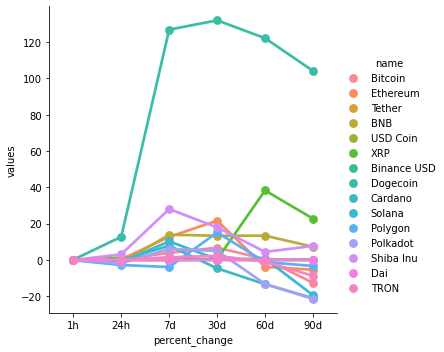

In [38]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [47]:
#anallysing bitcoin
df8 = df7.loc[df7['name']=='Bitcoin']
df8

,name,percent_change,values
0,Bitcoin,1h,-0.03864
1,Bitcoin,24h,0.23259
2,Bitcoin,7d,3.83790
3,Bitcoin,30d,6.68090
4,Bitcoin,60d,0.47476
5,Bitcoin,90d,-12.69770


<AxesSubplot:xlabel='values', ylabel='percent_change'>

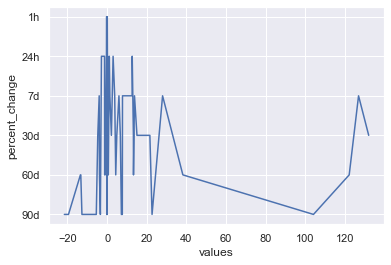

In [48]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='values', y='percent_change', data = df7)


In [50]:
df9 = d3.loc[d3['name']=='Bitcoin']
df9

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19195462.00000,19195462.00000,NaN,1,NaN,NaN,NaN,2022-11-01T15:42:00.000Z,20415.59521,42243704394.50040,4.13370,-0.09965,0.23045,3.89682,6.71035,0.44715,-12.67082,391886782142.02667,38.61890,428727499498.71002,NaN,2022-11-01T15:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:44:28.948251
15,0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19195462.00000,19195462.00000,NaN,1,NaN,NaN,NaN,2022-11-01T15:43:00.000Z,20416.10605,42257331253.03764,4.14920,-0.06165,0.24296,3.87143,6.71766,0.47479,-12.68183,391896587857.91290,38.66920,428738227035.96002,NaN,2022-11-01T15:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:45:30.406662
30,0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19195462.00000,19195462.00000,NaN,1,NaN,NaN,NaN,2022-11-01T15:46:00.000Z,20411.71971,42263662840.69940,4.06950,-0.03864,0.23259,3.83790,6.68090,0.47476,-12.69770,391812390072.21191,38.66090,428646113936.53998,NaN,2022-11-01T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:46:32.175889
45,0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19195462.00000,19195462.00000,NaN,1,NaN,NaN,NaN,2022-11-01T15:46:00.000Z,20411.71971,42263662840.69940,4.06950,-0.03864,0.23259,3.83790,6.68090,0.47476,-12.69770,391812390072.21191,38.66090,428646113936.53998,NaN,2022-11-01T15:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 15:47:33.484205


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

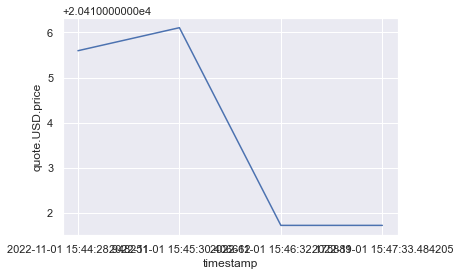

In [52]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df9)
